# Imports

In [403]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams

In [404]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [405]:
import seaborn as sb
sb.set_style('whitegrid')

# Getting Dataframe

In [406]:
path = r'C:\Users\Mohit\Desktop\ML-Cricket-Integration-Project\Data\Engineered_Balls_Data.csv'
balls_info = pd.read_csv(path)

# Data Filteration

In [407]:
balls_info.head()

,Unnamed: 0,Format,Game Location,Line,Length,Location,Speed,Bowling Style,Bounce,Out
0,0,Test,Hyderabad (Deccan),Wide Outside Off,Short,Point,70,Right arm Offbreak,Normal,0
1,1,Test,Hyderabad (Deccan),Middle Stump,Full,Midwicket,141,Right-arm fast,Normal,0
2,2,Test,Hyderabad (Deccan),Middle Stump,Full,Long-off,144,Right-arm fast,Normal,0
3,3,Test,Hyderabad (Deccan),Offside,Good,Wicketkeeper,147,Right-arm fast,Normal,0
4,4,Test,Hyderabad (Deccan),Off Stump,Back of a Length,Covers,148,Right-arm fast,Low,0


In [408]:
# Removing the Unnamed: 0 row because it was useless
balls_info = balls_info.drop(columns = ['Unnamed: 0'])
balls_info.head()

,Format,Game Location,Line,Length,Location,Speed,Bowling Style,Bounce,Out
0,Test,Hyderabad (Deccan),Wide Outside Off,Short,Point,70,Right arm Offbreak,Normal,0
1,Test,Hyderabad (Deccan),Middle Stump,Full,Midwicket,141,Right-arm fast,Normal,0
2,Test,Hyderabad (Deccan),Middle Stump,Full,Long-off,144,Right-arm fast,Normal,0
3,Test,Hyderabad (Deccan),Offside,Good,Wicketkeeper,147,Right-arm fast,Normal,0
4,Test,Hyderabad (Deccan),Off Stump,Back of a Length,Covers,148,Right-arm fast,Low,0


In [409]:
balls_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11135 entries, 0 to 11134
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Format         11135 non-null  object
 1   Game Location  11135 non-null  object
 2   Line           11135 non-null  object
 3   Length         11135 non-null  object
 4   Location       11135 non-null  object
 5   Speed          11135 non-null  int64 
 6   Bowling Style  10934 non-null  object
 7   Bounce         11135 non-null  object
 8   Out            11135 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 783.1+ KB


In [410]:
# Want to remove the data where bowling style is null (in this case, the speed will be -1)
balls_info.dropna(inplace = True)

In [411]:
# We don't want any null values
balls_info.isnull().sum()

Format           0
Game Location    0
Line             0
Length           0
Location         0
Speed            0
Bowling Style    0
Bounce           0
Out              0
dtype: int64

In [412]:
len(balls_info[balls_info['Speed'] == -1])

54

In [413]:
# Removing the rows where speed is not found
balls_info.drop(balls_info[balls_info['Speed'] == -1].index, inplace = True)

In [414]:
len(balls_info[balls_info['Speed'] == -1])

0

In [415]:
# Notice how the minimum for Speed is 0 which doesn't make sense
balls_info.describe()

,Speed,Out
count,1.088000e+04,10880.000000
mean,3.445753e+02,0.013419
std,1.593081e+04,0.115066
min,0.000000e+00,0.000000
25%,8.300000e+01,0.000000
50%,1.260000e+02,0.000000
75%,1.370000e+02,0.000000
max,1.421000e+06,1.000000


In [416]:
# Removing the rows where the speed is 0
balls_info.drop(balls_info[balls_info['Speed'] == 0].index, inplace = True)

In [417]:
# Still, the minimum for speed is 1 which doesn't make any sense
balls_info.describe()

,Speed,Out
count,1.086800e+04,10868.000000
mean,3.449557e+02,0.013434
std,1.593960e+04,0.115129
min,1.000000e+00,0.000000
25%,8.300000e+01,0.000000
50%,1.260000e+02,0.000000
75%,1.370000e+02,0.000000
max,1.421000e+06,1.000000


In [418]:
balls_info.drop(balls_info[balls_info['Speed'] == 1].index, inplace = True)

In [419]:
# Now all the values make sense
balls_info.describe()

,Speed,Out
count,1.086700e+04,10867.000000
mean,3.449874e+02,0.013435
std,1.594034e+04,0.115134
min,4.100000e+01,0.000000
25%,8.300000e+01,0.000000
50%,1.260000e+02,0.000000
75%,1.370000e+02,0.000000
max,1.421000e+06,1.000000


In [420]:
# After all these edits, we need to fix the index of balls_info
balls_info.index = np.arange(0, len(balls_info))

# Data Exploration

In [421]:
balls_info.columns

Index(['Format', 'Game Location', 'Line', 'Length', 'Location', 'Speed',
       'Bowling Style', 'Bounce', 'Out'],
      dtype='object')

In [422]:
na_speed = len(balls_info[balls_info['Speed'] == -1])
na_speed / len(balls_info) * 100 # percent of data for speed that is not available

0.0

In [423]:
# Creating the wickets dataframe, in which only the wicket balls consist
wicket_info = balls_info[balls_info['Out'] == 1]

# Fixing the index of the dataframe
wicket_info.index = np.arange(0, len(wicket_info))
wicket_info

,Format,Game Location,Line,Length,Location,Speed,Bowling Style,Bounce,Out
0,Test,Hyderabad (Deccan),Middle Stump,Good,Midwicket,51,Slow Left arm Orthodox,Normal,1
1,Test,Pune,Wide Outside Off,Full,First slip,147,Left-arm fast,Normal,1
2,Test,Pune,Off Stump,Good,Wicketkeeper,60,Slow left-arm orthodox,Normal,1
3,Test,Bengaluru,Offside,Good,Wicketkeeper,90,Right arm Offbreak,Normal,1
4,Test,Bengaluru,Middle Stump,Good,Close,129,Right arm Fast medium,Normal,1
...,...,...,...,...,...,...,...,...,...
141,T20I,Hamilton,Offside,Full,Wicketkeeper,113,Right arm Medium fast,Normal,1
142,T20I,Wellington,Middle Stump,Good,Close,112,Right arm Medium fast,Normal,1
143,T20I,Canberra,Middle Stump,Short,Offside,89,Legbreak,High,1
144,T20I,Sydney,Offside,Short,Offside,135,Left arm Fast medium,Normal,1


In [424]:
wicket_na_speed = len(wicket_info[wicket_info['Speed'] == -1])
wicket_na_speed / len(wicket_info) * 100 # percent of wicket data for which speed is not available

0.0

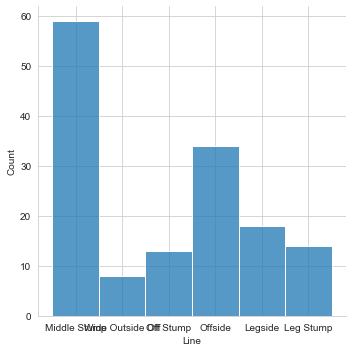

In [425]:
# Is there a specific line which Virat Kohli gets out a lot on?
line = wicket_info['Line']
sb.displot(line)

<AxesSubplot:xlabel='Length', ylabel='Count'>

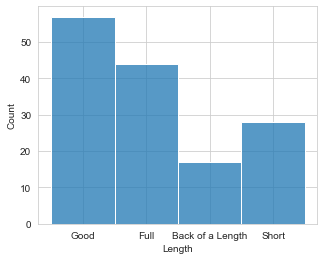

In [426]:
# Is there a specific length which Virat Kohli gets out a lot on?
length = wicket_info['Length']
sb.histplot(length)

<AxesSubplot:xlabel='Speed', ylabel='Count'>

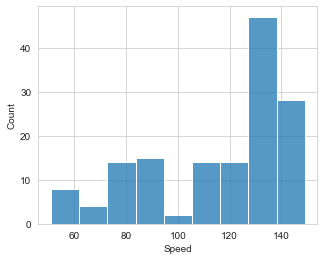

In [427]:
# Do faster balls get Virat Kohli out more often?
speed = wicket_info['Speed']
sb.histplot(speed)

# Logistic Regression

In [428]:
import sklearn
from sklearn import preprocessing

In [429]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [430]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [431]:
balls_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10867 entries, 0 to 10866
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Format         10867 non-null  object
 1   Game Location  10867 non-null  object
 2   Line           10867 non-null  object
 3   Length         10867 non-null  object
 4   Location       10867 non-null  object
 5   Speed          10867 non-null  int64 
 6   Bowling Style  10867 non-null  object
 7   Bounce         10867 non-null  object
 8   Out            10867 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 849.0+ KB


## Checking the Conditions for Logistic Regression

### Checking that Target Variable is Binary

<AxesSubplot:xlabel='Out', ylabel='count'>

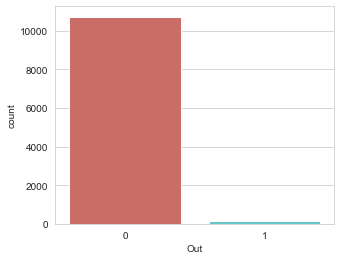

In [432]:
sb.countplot(x = 'Out', data = balls_info, palette = 'hls')

### Checking and Taking Care of Missing Values

In [433]:
# No null values
balls_info.isnull().sum()

Format           0
Game Location    0
Line             0
Length           0
Location         0
Speed            0
Bowling Style    0
Bounce           0
Out              0
dtype: int64

In [434]:
# Everything looks good
balls_info.describe()

,Speed,Out
count,1.086700e+04,10867.000000
mean,3.449874e+02,0.013435
std,1.594034e+04,0.115134
min,4.100000e+01,0.000000
25%,8.300000e+01,0.000000
50%,1.260000e+02,0.000000
75%,1.370000e+02,0.000000
max,1.421000e+06,1.000000


### Converting Categorical Variables to Dummy Indicators

In [435]:
# Since there are a fixed number of columns, we can use One Hot Encoding in this case
# Also the data isn't ordinal
balls_info['Format'].unique()

array(['Test', 'ODI', 'T20I'], dtype=object)

In [436]:
# There are too many options so we shouldn't use One Hot Encoding as it can increase memory usage and computation times
balls_info['Game Location'].unique()

array(['Hyderabad (Deccan)', 'Pune', 'Bengaluru', 'Ranchi', 'Kolkata',
       'Nagpur', 'Delhi', 'Rajkot', 'Visakhapatnam', 'Indore', 'Chennai',
       'Ahmedabad', 'Cuttack', 'Birmingham', 'The Oval', 'Mumbai',
       'Kanpur', 'Guwahati', 'Mumbai (BS)', 'Thiruvananthapuram',
       'Mohali', 'Southampton', 'Manchester', 'Leeds', 'Lauderhill',
       'Galle', 'Colombo (SSC)', 'Pallekele', 'Cape Town', 'Centurion',
       'Johannesburg', "Lord's", 'Nottingham', 'Adelaide', 'Perth',
       'Melbourne', 'Sydney', 'North Sound', 'Kingston', 'Wellington',
       'Christchurch', 'Port of Spain', 'Dambulla', 'Colombo (RPS)',
       'Durban', 'Port Elizabeth', 'Napier', 'Mount Maunganui',
       'Hamilton', 'Auckland', 'Canberra', 'Dublin (Malahide)', 'Cardiff',
       'Bristol', 'Brisbane', 'Providence'], dtype=object)

In [437]:
# We can use One Hot Encoding in this case because there are not too many choices
# The data isn't ordinal either
balls_info['Line'].unique()

array(['Wide Outside Off', 'Middle Stump', 'Offside', 'Off Stump',
       'Leg Stump', 'Legside'], dtype=object)

In [438]:
# Here also we can use One Hot Encoding as the data is not ordinal and there are only 4 choices
balls_info['Length'].unique()

array(['Short', 'Full', 'Good', 'Back of a Length'], dtype=object)

In [439]:
# Too many options so we shouldn't use One Hot Encoding
balls_info['Location'].unique()

array(['Point', 'Midwicket', 'Long-off', 'Wicketkeeper', 'Covers',
       'Offside', 'Deep Square Leg', 'Square Leg', 'Close', 'Mid-On',
       'Long Leg', 'Mid-Off', 'Deep Point', 'Legside', 'Long-on',
       'Short Leg', 'Extra Cover', 'Third Man', 'Deep Midwicket',
       'Sweeper', 'Gully', 'First slip', 'Fine Leg', 'Second slip',
       'Short Third Man', 'Short Fine Leg'], dtype=object)

In [440]:
# Again, too many options so using One Hot Encoding isn't going to be useful
balls_info['Bowling Style'].unique()

array(['Right arm Offbreak', 'Right-arm fast', 'Right-arm medium-fast',
       'Slow Left arm Orthodox', 'Legbreak', 'Left-arm fast',
       'Slow left-arm orthodox', 'Right arm Fast medium',
       'Right arm Fast', 'Right-arm fast-medium', 'Right-arm medium',
       'Right-arm offbreak', 'Right arm Medium', 'Slow left-arm chinaman',
       'Right arm Medium fast', 'Right-arm offbreak, Legbreak',
       'Left-arm fast-medium', 'Left arm Fast', 'Legbreak googly',
       'Left arm Fast medium', 'Left-arm medium-fast',
       'Left arm Medium fast', 'Right arm Offbreak, Legbreak',
       'Legbreak Googly'], dtype=object)

In [441]:
# Only a few options for this but this could be ordinal data so we shouldn't use One Hot Encoding
balls_info['Bounce'].unique()

array(['Normal', 'Low', 'High'], dtype=object)

In [442]:
label_encoder = LabelEncoder()
binary_encoder = OneHotEncoder(categories = 'auto')

In [443]:
# Converting Format Feature to Binary Features
format_categorical = balls_info['Format']
format_encoded = label_encoder.fit_transform(format_categorical)

format_1hot = binary_encoder.fit_transform(format_encoded.reshape(-1, 1))
format_1hot_matrix = format_1hot.toarray()
format_df = pd.DataFrame(format_1hot_matrix, columns = ['ODI', 'T20', 'Test'])
format_df.head()

,ODI,T20,Test
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [444]:
# Converting Game Location Feature to Numbers
game_location_categorical = balls_info['Game Location']
game_location_encoded = label_encoder.fit_transform(game_location_categorical)
game_location_encoded[0:10]

array([23, 23, 23, 23, 23, 23, 23, 23, 23, 23])

In [445]:
# The index is the encoded value for the specific Game Location
label_encoder.classes_

array(['Adelaide', 'Ahmedabad', 'Auckland', 'Bengaluru', 'Birmingham',
       'Brisbane', 'Bristol', 'Canberra', 'Cape Town', 'Cardiff',
       'Centurion', 'Chennai', 'Christchurch', 'Colombo (RPS)',
       'Colombo (SSC)', 'Cuttack', 'Dambulla', 'Delhi',
       'Dublin (Malahide)', 'Durban', 'Galle', 'Guwahati', 'Hamilton',
       'Hyderabad (Deccan)', 'Indore', 'Johannesburg', 'Kanpur',
       'Kingston', 'Kolkata', 'Lauderhill', 'Leeds', "Lord's",
       'Manchester', 'Melbourne', 'Mohali', 'Mount Maunganui', 'Mumbai',
       'Mumbai (BS)', 'Nagpur', 'Napier', 'North Sound', 'Nottingham',
       'Pallekele', 'Perth', 'Port Elizabeth', 'Port of Spain',
       'Providence', 'Pune', 'Rajkot', 'Ranchi', 'Southampton', 'Sydney',
       'The Oval', 'Thiruvananthapuram', 'Visakhapatnam', 'Wellington'],
      dtype=object)

In [446]:
# Converting Line Feature to Binary Features
line_categorical = balls_info['Line']
line_encoded = label_encoder.fit_transform(line_categorical)

line_1hot = binary_encoder.fit_transform(line_encoded.reshape(-1, 1))
line_1hot_matrix = line_1hot.toarray()
line_df = pd.DataFrame(line_1hot_matrix, columns = ['Line: Leg Stump', 'Line: Legside', 'Line: Middle Stump', 'Line: Off Stump', 'Line: Offside', 'Line: Wide Outside Off'])
line_df.head()

,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0


In [447]:
# Converting Length Feature to Binary Features
length_categorical = balls_info['Length']
length_encoded = label_encoder.fit_transform(length_categorical)

length_1hot = binary_encoder.fit_transform(length_encoded.reshape(-1, 1))
length_1hot_matrix = length_1hot.toarray()
length_df = pd.DataFrame(length_1hot_matrix, columns = ['Length: Back of a Length', 'Length: Full', 'Length: Good', 'Length: Short'])
length_df.head()

,Length: Back of a Length,Length: Full,Length: Good,Length: Short
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


In [448]:
# Converting Location Feature to Numbers
location_categorical = balls_info['Location']
location_encoded = label_encoder.fit_transform(location_categorical)
location_encoded[0:10]

array([17, 15, 11, 25,  1, 16,  4, 15, 22,  0])

In [449]:
# The indexes are the encoded values for each of the locations
label_encoder.classes_

array(['Close', 'Covers', 'Deep Midwicket', 'Deep Point',
       'Deep Square Leg', 'Extra Cover', 'Fine Leg', 'First slip',
       'Gully', 'Legside', 'Long Leg', 'Long-off', 'Long-on', 'Mid-Off',
       'Mid-On', 'Midwicket', 'Offside', 'Point', 'Second slip',
       'Short Fine Leg', 'Short Leg', 'Short Third Man', 'Square Leg',
       'Sweeper', 'Third Man', 'Wicketkeeper'], dtype=object)

In [450]:
# Converting Bowling Style Feature to Numbers
bowling_style_categorical = balls_info['Bowling Style']
bowling_style_encoded = label_encoder.fit_transform(bowling_style_categorical)
bowling_style_encoded[0:10]

array([13, 15, 15, 15, 15, 13, 13, 13, 13, 13])

In [451]:
# The indexes are the encoded values for each of the bowling styles
label_encoder.classes_

array(['Left arm Fast', 'Left arm Fast medium', 'Left arm Medium fast',
       'Left-arm fast', 'Left-arm fast-medium', 'Left-arm medium-fast',
       'Legbreak', 'Legbreak Googly', 'Legbreak googly', 'Right arm Fast',
       'Right arm Fast medium', 'Right arm Medium',
       'Right arm Medium fast', 'Right arm Offbreak',
       'Right arm Offbreak, Legbreak', 'Right-arm fast',
       'Right-arm fast-medium', 'Right-arm medium',
       'Right-arm medium-fast', 'Right-arm offbreak',
       'Right-arm offbreak, Legbreak', 'Slow Left arm Orthodox',
       'Slow left-arm chinaman', 'Slow left-arm orthodox'], dtype=object)

In [452]:
# Converting Bounce Feature to Numbers
bounce_categorical = balls_info['Bounce']
bounce_encoded = label_encoder.fit_transform(bounce_categorical)
bounce_encoded[0:10]

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2])

In [453]:
# The indexes are encoded values for each of the bounce increments
label_encoder.classes_

array(['High', 'Low', 'Normal'], dtype=object)

In [454]:
# Getting the list of the Speed Column so we can add it in the order we want into the balls_info dataframe
speed = balls_info['Speed'].to_list()
speed[0:10]

[70, 141, 144, 147, 148, 92, 70, 86, 82, 71]

In [455]:
# Getting the list of the Out Column so we can add it in the order we want into the balls_info dataframe
out = balls_info['Out'].to_list()
out[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [456]:
# Removing all the features that are going to be revised
balls_info.drop(['Format'], axis = 1, inplace = True)
balls_info.drop(['Game Location'], axis = 1, inplace = True)
balls_info.drop(['Line'], axis = 1, inplace = True)
balls_info.drop(['Length'], axis = 1, inplace = True)
balls_info.drop(['Location'], axis = 1, inplace = True)
balls_info.drop(['Bowling Style'], axis = 1, inplace = True)
balls_info.drop(['Bounce'], axis = 1, inplace = True)

# Removing these so we can decide the order in which the columns appear in our dataframe
balls_info.drop(['Speed'], axis = 1, inplace = True)
balls_info.drop(['Out'], axis = 1, inplace = True)

In [457]:
# Adding all the features to the dataframe
balls_info = pd.concat([balls_info, format_df], axis = 1)
balls_info['Game Location'] = game_location_encoded
balls_info['Bowling Style'] = bowling_style_encoded
balls_info['Speed'] = speed
balls_info = pd.concat([balls_info, length_df], axis = 1)
balls_info = pd.concat([balls_info, line_df], axis = 1)
balls_info['Bounce'] = bounce_encoded
balls_info['Out'] = out
balls_info

,ODI,T20,Test,Game Location,Bowling Style,Speed,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Bounce,Out
0,0.0,0.0,1.0,23,13,70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0
1,0.0,0.0,1.0,23,15,141,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0
2,0.0,0.0,1.0,23,15,144,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0
3,0.0,0.0,1.0,23,15,147,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0
4,0.0,0.0,1.0,23,15,148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10862,0.0,1.0,0.0,51,18,123,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
10863,0.0,1.0,0.0,51,8,95,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0
10864,0.0,1.0,0.0,51,8,99,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0
10865,0.0,1.0,0.0,51,8,91,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0


### Checking for Independence Between Features

<AxesSubplot:>

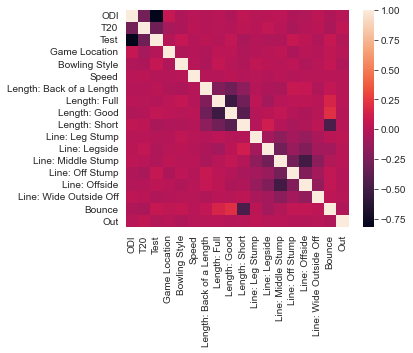

In [458]:
sb.heatmap(balls_info.corr())

In [459]:
# ODI and Test have high correlation but that doesn't matter because they are part of the same feature which we broke up
# Line: Middle Stump and Line: Offisde have moderate correlation but doesn't matter because they are part of the same initial feature
# Length: Full and Length: Good have high correlation but doesn't matter because they are part of the same initial feature
# Bounce and Length: Short are correlated so we can remove Bounce since that feature isn't that important
balls_info.drop(['Bounce'], axis = 1, inplace = True)

### Checking if the Dataset Size is Sufficient

In [460]:
# Logistic Regression assumes that you have at least 50 values per predictive feature
balls_info.head() # 16 features

,ODI,T20,Test,Game Location,Bowling Style,Speed,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
0,0.0,0.0,1.0,23,13,70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,1.0,23,15,141,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,23,15,144,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,23,15,147,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,0.0,1.0,23,15,148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [461]:
# 16 * 50 = 800 rows need to be there
balls_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10867 entries, 0 to 10866
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ODI                       10867 non-null  float64
 1   T20                       10867 non-null  float64
 2   Test                      10867 non-null  float64
 3   Game Location             10867 non-null  int32  
 4   Bowling Style             10867 non-null  int32  
 5   Speed                     10867 non-null  int64  
 6   Length: Back of a Length  10867 non-null  float64
 7   Length: Full              10867 non-null  float64
 8   Length: Good              10867 non-null  float64
 9   Length: Short             10867 non-null  float64
 10  Line: Leg Stump           10867 non-null  float64
 11  Line: Legside             10867 non-null  float64
 12  Line: Middle Stump        10867 non-null  float64
 13  Line: Off Stump           10867 non-null  float64
 14  Line: 

# Saving the Prepared Dataframe as CSV for ML

In [462]:
balls_info.to_csv('Prepared_for_ML_Data.csv')